Goals
* Introduce the TensorFlow Keras API 
* Show an example of training model
* Discuss Gradient Descent during the process
* Optional: Investigate the TensorFlow / Keras Code for Dense Layers.

In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

1. Import Tensorflow
2. Define a model
3. Compile the model
4. Fit the Model 
5. Evaluate the model

In [2]:
# 10 Categories Output

model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

In [3]:
# Compile the model
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

3


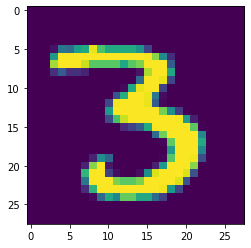

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[12])
print(y_train[12])

In [8]:
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
X_train.shape

(60000, 784)

In [11]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2197 - accuracy: 0.2740
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0310 - accuracy: 0.4288
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8304 - accuracy: 0.5598
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6332 - accuracy: 0.6182
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4599 - accuracy: 0.6485
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3233 - accuracy: 0.6751
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2157 - accuracy: 0.6827
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1485 - accuracy: 0.6908
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0869 - accuracy: 0.7041
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 1.080

## Stochastic Gradient Descent
* Batches
* Learning Rate
* Evaluation

## Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point. 

- Smaller Batch = Slower Run Time (but maybe more accurate results)
- Default Batch = Balance between speed and accuracy
- Large Batch = Very fast, but not nearly as accurate

In [12]:
sgd = SGD(learning_rate=0.01)

### Default Experiment

In [13]:
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
bt_default = model.fit(X_train, y_train, 
                       epochs=25,
                       batch_size=32,
                       validation_data=(X_test,y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2012 - accuracy: 0.2638 - val_loss: 2.1185 - val_accuracy: 0.2971
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0150 - accuracy: 0.4187 - val_loss: 1.9087 - val_accuracy: 0.4757
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8265 - accuracy: 0.4642 - val_loss: 1.7228 - val_accuracy: 0.4952
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6527 - accuracy: 0.5009 - val_loss: 1.5914 - val_accuracy: 0.5359
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5335 - accuracy: 0.5221 - val_loss: 1.4734 - val_accuracy: 0.5516
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4246 - accuracy: 0.5274 - val_loss: 1.3789 - val_accuracy: 0.5486
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3627 - accuracy: 0.5288 - val_loss: 1.2855 - val_accuracy:

### Small Batch Experiment

In [15]:
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
bt_small = model.fit(X_train, y_train, 
                       epochs=25,
                       batch_size=8,
                       validation_data=(X_test,y_test))

Epoch 1/25
7500/7500 [==============================] - 16s 2ms/step - loss: 2.1342 - accuracy: 0.2386 - val_loss: 1.9516 - val_accuracy: 0.2857
Epoch 2/25
7500/7500 [==============================] - 16s 2ms/step - loss: 1.8194 - accuracy: 0.3564 - val_loss: 1.7476 - val_accuracy: 0.4068
Epoch 3/25
7500/7500 [==============================] - 16s 2ms/step - loss: 1.6654 - accuracy: 0.4061 - val_loss: 1.5452 - val_accuracy: 0.4325
Epoch 4/25
7500/7500 [==============================] - 16s 2ms/step - loss: 1.6165 - accuracy: 0.3940 - val_loss: 1.6413 - val_accuracy: 0.3629
Epoch 5/25
7500/7500 [==============================] - 17s 2ms/step - loss: 1.5906 - accuracy: 0.3920 - val_loss: 1.5679 - val_accuracy: 0.3977
Epoch 6/25
7500/7500 [==============================] - 15s 2ms/step - loss: 1.6743 - accuracy: 0.3392 - val_loss: 1.7119 - val_accuracy: 0.3806
Epoch 7/25
7500/7500 [==============================] - 15s 2ms/step - loss: 1.6620 - accuracy: 0.3778 - val_loss: 1.6517 - val_ac

### Large Batch Size Experiment

In [18]:
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
bt_large = model.fit(X_train, y_train, 
                       epochs=25,
                       batch_size=512,
                       validation_data=(X_test,y_test))

Epoch 1/25
118/118 [==============================] - 0s 3ms/step - loss: 2.2982 - accuracy: 0.0921 - val_loss: 2.2742 - val_accuracy: 0.1051
Epoch 2/25
118/118 [==============================] - 0s 3ms/step - loss: 2.2605 - accuracy: 0.1267 - val_loss: 2.2481 - val_accuracy: 0.1434
Epoch 3/25
118/118 [==============================] - 0s 3ms/step - loss: 2.2401 - accuracy: 0.1474 - val_loss: 2.2318 - val_accuracy: 0.1544
Epoch 4/25
118/118 [==============================] - 0s 3ms/step - loss: 2.2259 - accuracy: 0.2011 - val_loss: 2.2184 - val_accuracy: 0.2301
Epoch 5/25
118/118 [==============================] - 0s 3ms/step - loss: 2.2133 - accuracy: 0.2825 - val_loss: 2.2068 - val_accuracy: 0.3303
Epoch 6/25
118/118 [==============================] - 0s 3ms/step - loss: 2.2017 - accuracy: 0.3331 - val_loss: 2.1951 - val_accuracy: 0.3540
Epoch 7/25
118/118 [==============================] - 0s 3ms/step - loss: 2.1901 - accuracy: 0.3554 - val_loss: 2.1827 - val_accuracy: 0.3852
Epoch 

### Visualization of Results

In [21]:
import seaborn as sns
import pandas as pd

In [52]:
default = pd.DataFrame.from_dict(bt_default.history)
default['epoch'] = default.index.values
default['batch_size'] = 'default32'

large = pd.DataFrame.from_dict(bt_large.history)
large['epoch'] = large.index.values
large['batch_size'] =  'large512'

small = pd.DataFrame.from_dict(bt_small.history)
small['epoch'] = small.index.values
small['batch_size'] = 'small8'

df = pd.concat([default,large, small])
df['batch_size'] = df['batch_size'].astype('str')

In [53]:
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,batch_size
0,2.201216,0.263833,2.118528,0.2971,0,default32
1,2.014980,0.418667,1.908655,0.4757,1,default32
2,1.826533,0.464233,1.722847,0.4952,2,default32
3,1.652737,0.500883,1.591400,0.5359,3,default32
4,1.533492,0.522133,1.473436,0.5516,4,default32


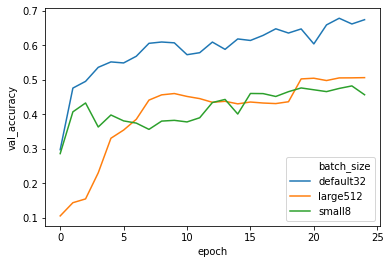

In [54]:
sns.lineplot(x='epoch', y='val_accuracy', hue='batch_size', data=df)

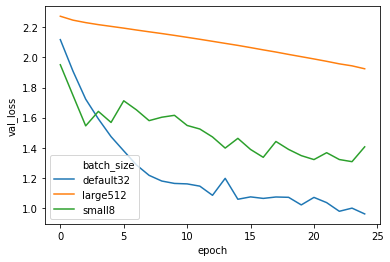

In [55]:
sns.lineplot(x='epoch', y='val_loss', hue='batch_size', data=df)

## Learning Rate 

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will never "converge"
* Goldy Locks parameters - it needs be "just right"
* Scale of 0-1

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### High Learning Rate

In [61]:
sgd = SGD(learning_rate=0.75)

In [59]:
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
lr_high = model.fit(X_train, y_train, 
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test,y_test))

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 2.2483 - accuracy: 0.1419 - val_loss: 2.1021 - val_accuracy: 0.1908
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 2.1680 - accuracy: 0.1599 - val_loss: 2.2188 - val_accuracy: 0.1412
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0823 - accuracy: 0.1726 - val_loss: 2.1917 - val_accuracy: 0.1605
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0582 - accuracy: 0.1814 - val_loss: 2.0958 - val_accuracy: 0.1789
Epoch 5/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0750 - accuracy: 0.1804 - val_loss: 1.9935 - val_accuracy: 0.2026
Epoch 6/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0032 - accuracy: 0.1877 - val_loss: 1.9866 - val_accuracy: 0.1900
Epoch 7/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0275 - accuracy: 0.1786 - val_loss: 2.0544 - val_accuracy: 0.1803
Epoch 

### Default Learning Rate

In [62]:
sgd = SGD(learning_rate=0.01)

In [63]:
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
lr_default = model.fit(X_train, y_train, 
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test,y_test))

Epoch 1/25
938/938 [==============================] - 2s 3ms/step - loss: 2.2945 - accuracy: 0.2000 - val_loss: 2.2330 - val_accuracy: 0.2966
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 2.1969 - accuracy: 0.3381 - val_loss: 2.1633 - val_accuracy: 0.3530
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 2.1296 - accuracy: 0.4024 - val_loss: 2.0899 - val_accuracy: 0.4161
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 2.0498 - accuracy: 0.4815 - val_loss: 2.0038 - val_accuracy: 0.4857
Epoch 5/25
938/938 [==============================] - 2s 2ms/step - loss: 1.9548 - accuracy: 0.5288 - val_loss: 1.9056 - val_accuracy: 0.5590
Epoch 6/25
938/938 [==============================] - 2s 2ms/step - loss: 1.8535 - accuracy: 0.5606 - val_loss: 1.8056 - val_accuracy: 0.5590
Epoch 7/25
938/938 [==============================] - 2s 2ms/step - loss: 1.7513 - accuracy: 0.5598 - val_loss: 1.6941 - val_accuracy: 0.5710
Epoch 

### Low Learning Rate

In [65]:
sgd = SGD(learning_rate=0.0001)

In [66]:
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784),
                    Dense(5, activation='sigmoid'), 
                    Dense(10, activation='softmax')
])

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
lr_low = model.fit(X_train, y_train, 
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test,y_test))

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 2.4182 - accuracy: 0.1022 - val_loss: 2.4137 - val_accuracy: 0.1010
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 2.4030 - accuracy: 0.1022 - val_loss: 2.3988 - val_accuracy: 0.1010
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 2.3882 - accuracy: 0.1022 - val_loss: 2.3819 - val_accuracy: 0.1010
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 2.3716 - accuracy: 0.1022 - val_loss: 2.3656 - val_accuracy: 0.1010
Epoch 5/25
938/938 [==============================] - 2s 2ms/step - loss: 2.3582 - accuracy: 0.1022 - val_loss: 2.3538 - val_accuracy: 0.1010
Epoch 6/25
938/938 [==============================] - 2s 2ms/step - loss: 2.3484 - accuracy: 0.1022 - val_loss: 2.3457 - val_accuracy: 0.1010
Epoch 7/25
938/938 [==============================] - 2s 2ms/step - loss: 2.3416 - accuracy: 0.1022 - val_loss: 2.3401 - val_accuracy: 0.1010
Epoch 

### Visualization of Results

In [ ]:
import seaborn as sns
import pandas as pd

In [69]:
default = pd.DataFrame.from_dict(lr_default.history)
default['epoch'] = default.index.values
default['lr_size'] = 'default'

large = pd.DataFrame.from_dict(lr_high.history)
large['epoch'] = large.index.values
large['lr_size'] =  'high'

small = pd.DataFrame.from_dict(lr_low.history)
small['epoch'] = small.index.values
small['lr_size'] = 'low'

df = pd.concat([default,large, small])

In [70]:
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,lr_size
0,2.294540,0.200033,2.233032,0.2966,0,default
1,2.196878,0.338050,2.163320,0.3530,1,default
2,2.129591,0.402350,2.089933,0.4161,2,default
3,2.049754,0.481483,2.003803,0.4857,3,default
4,1.954829,0.528817,1.905571,0.5590,4,default


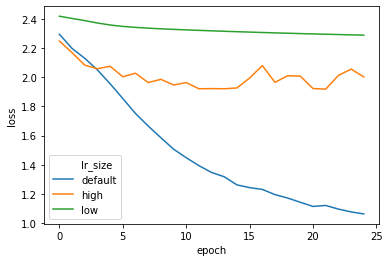

In [72]:
sns.lineplot(x='epoch', y='loss', hue='lr_size', data=df)

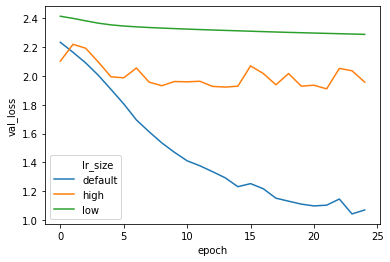

In [73]:
sns.lineplot(x='epoch', y='val_loss', hue='lr_size', data=df)